In [3]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [4]:
import os

import numpy as np
import pandas as pd
from astropy.table import Table
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context('notebook')

from agnfinder import visualise_templates

In [5]:
DATA_ROOT='/media/mike/internal/agnfinder'

In [6]:
!ls {DATA_ROOT}

LIBRARY_STAR_XXL_North.dat.fits        LIBRARY_XXLN_Spirals.lib.dat.fits
LIBRARY_XXLN_AGN.lib.dat.fits	       LIBRARY_XXLN_Starburst.lib.dat.fits
LIBRARY_XXLN_Ellipticals.lib.dat.fits  README
LIBRARY_XXLN_QSO.lib.dat.fits	       uK_IR_final.fits


# Visualise Templates

In [7]:
ellipticals = Table.read(os.path.join(DATA_ROOT, 'LIBRARY_XXLN_Ellipticals.lib.dat.fits')).to_pandas()
len(ellipticals)

4242

In [8]:
ellipticals.columns.values

array(['model', 'Ext_law', 'EB_V', 'L_TIR', 'z', 'DM', 'age_yrs', 'nrec',
       'n', 'FUV_GALEX', 'NUV_galex', 'u_cfht', 'g_cfht', 'r_cfht',
       'i_cfht_old', 'i_cfht_new', 'z_cfht', 'u_sdss', 'g_sdss', 'r_sdss',
       'i_sdss', 'z_sdss', 'z_vista', 'Y_vista', 'J_vista', 'H_vista',
       'Ks_vista', 'J_ukidss', 'H_ukidss', 'K_ukidss', 'K_WIRcam',
       'IRAC_1', 'IRAC_2', 'WISE_1', 'WISE_2', 'wise_3', 'wise_4',
       'K_COR_FUV_GALEX', 'K_COR_NUV_galex', 'K_COR_u_cfht',
       'K_COR_g_cfht', 'K_COR_r_cfht', 'K_COR_i_cfht', 'K_COR_y_cfht',
       'K_COR_z_cfht', 'K_COR_u_sdss', 'K_COR_g_sdss', 'K_COR_r_sdss',
       'K_COR_i_sdss', 'K_COR_z_sdss', 'K_COR_z_vista', 'K_COR_Y_vista',
       'K_COR_J_vista', 'K_COR_H_vista', 'K_COR_Ks_vista',
       'K_COR_J_ukidss', 'K_COR_H_ukidss', 'K_COR_K_ukidss',
       'K_COR_K_WIRcam', 'K_COR_IRAC_1', 'K_COR_IRAC_2', 'K_COR_WISE_1',
       'K_COR_WISE_2', 'K_COR_WISE_3', 'K_COR_WISE_4'], dtype=object)

In [9]:
ellipticals.iloc[0][['u_cfht', 'g_cfht', 'r_cfht',
       'i_cfht_old', 'i_cfht_new', 'z_cfht', 'u_sdss', 'g_sdss', 'r_sdss',
       'i_sdss', 'z_sdss', 'z_vista', 'Y_vista', 'J_vista', 'H_vista',
       'Ks_vista', 'J_ukidss', 'H_ukidss', 'K_ukidss']]

u_cfht       -14.3398
g_cfht       -15.3651
r_cfht       -15.8238
i_cfht_old   -16.0295
i_cfht_new   -16.0133
z_cfht       -16.1747
u_sdss       -13.9113
g_sdss       -15.2862
r_sdss       -15.8105
i_sdss       -16.0070
z_sdss       -16.1857
z_vista      -16.1621
Y_vista      -16.3192
J_vista      -16.3713
H_vista      -16.4721
Ks_vista     -16.1898
J_ukidss     -16.3711
H_ukidss     -16.4718
K_ukidss     -16.1389
Name: 0, dtype: float64

### Elliptical templates have no extinction or L_TIR (IR luminosity?)

In [10]:
ellipticals['Ext_law'].value_counts()

0    4242
Name: Ext_law, dtype: int64

In [11]:
ellipticals['EB_V'].value_counts()

0.0    4242
Name: EB_V, dtype: int64

In [12]:
ellipticals['L_TIR'].value_counts()

-99.0    4242
Name: L_TIR, dtype: int64

### K_COR is a k-correction to add or subtract to the mags, unsure which - will review LePhare docs

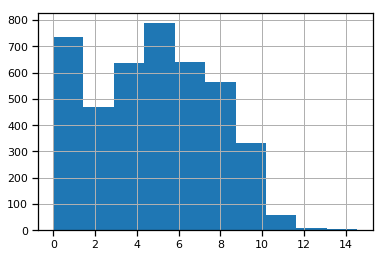

In [13]:
ellipticals['K_COR_i_sdss'].hist()

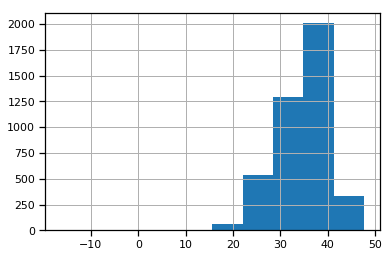

In [14]:
ellipticals['i_sdss'].hist()

### Templates are observed in small redshift steps out to z=6

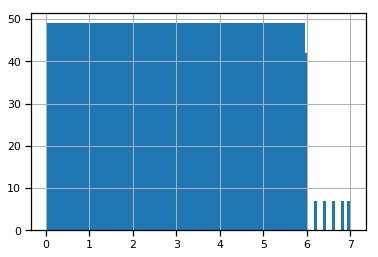

In [15]:
ellipticals['z'].hist(bins=100)

In [16]:
starburst = Table.read(os.path.join(DATA_ROOT, 'LIBRARY_XXLN_Starburst.lib.dat.fits')).to_pandas()
len(starburst)

259974

In [17]:
print(starburst.columns.values)

['model' 'Ext_law' 'EB_V' 'L_TIR' 'z' 'DM' 'age_yrs' 'nrec' 'n'
 'FUV_GALEX' 'NUV_galex' 'u_cfht' 'g_cfht' 'r_cfht' 'i_cfht_old'
 'i_cfht_new' 'z_cfht' 'u_sdss' 'g_sdss' 'r_sdss' 'i_sdss' 'z_sdss'
 'z_vista' 'Y_vista' 'J_vista' 'H_vista' 'Ks_vista' 'J_ukidss' 'H_ukidss'
 'K_ukidss' 'K_WIRcam' 'IRAC_1' 'IRAC_2' 'WISE_1' 'WISE_2' 'wise_3'
 'wise_4' 'K_COR_FUV_GALEX' 'K_COR_NUV_galex' 'K_COR_u_cfht'
 'K_COR_g_cfht' 'K_COR_r_cfht' 'K_COR_i_cfht' 'K_COR_y_cfht'
 'K_COR_z_cfht' 'K_COR_u_sdss' 'K_COR_g_sdss' 'K_COR_r_sdss'
 'K_COR_i_sdss' 'K_COR_z_sdss' 'K_COR_z_vista' 'K_COR_Y_vista'
 'K_COR_J_vista' 'K_COR_H_vista' 'K_COR_Ks_vista' 'K_COR_J_ukidss'
 'K_COR_H_ukidss' 'K_COR_K_ukidss' 'K_COR_K_WIRcam' 'K_COR_IRAC_1'
 'K_COR_IRAC_2' 'K_COR_WISE_1' 'K_COR_WISE_2' 'K_COR_WISE_3'
 'K_COR_WISE_4' 'em_line_FUV_GALEX' 'em_line_NUV_galex' 'em_line_u_cfht'
 'em_line_g_cfht' 'em_line_r_cfht' 'em_line_i_cfht' 'em_line_y_cfht'
 'em_line_z_cfht' 'em_line_u_sdss' 'em_line_g_sdss' 'em_line_r_sdss'
 'em_line

### Starburst DOES have extinction, from 0 (rarer due to grid?) to 0.5

In [18]:
starburst['Ext_law'].value_counts()

4    63024
3    63024
2    63024
1    63024
0     7878
Name: Ext_law, dtype: int64

In [19]:
starburst['EB_V'].value_counts()

0.20    31512
0.30    31512
0.10    31512
0.50    31512
0.15    31512
0.25    31512
0.05    31512
0.40    31512
0.00     7878
Name: EB_V, dtype: int64

### Starburst has emission line fluxes by band which are *not yet added to the magnitudes*

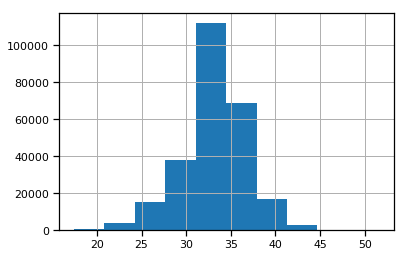

In [20]:
starburst.query('i_sdss > 15')['i_sdss'].hist()

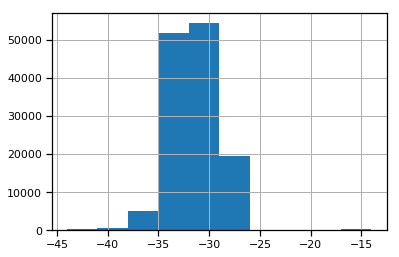

In [21]:
starburst.query('em_line_i_sdss > -100')['em_line_i_sdss'].hist()

Not quite sure what units this is - negative magnitudes would be incredibly bright? Will check the manual

In [22]:
len(starburst.query('em_line_i_sdss < -998')), len(starburst)

(127413, 259974)

Half of the starburst galaxies have NaN emission lines: why?

### QSO Templates

In [23]:
qso = Table.read(os.path.join(DATA_ROOT, 'LIBRARY_XXLN_QSO.lib.dat.fits')).to_pandas()
len(qso)

46662

In [24]:
qso.columns.values

array(['model', 'Ext_law', 'EB_V', 'L_TIR', 'z', 'DM', 'age_yrs', 'nrec',
       'n', 'FUV_GALEX', 'NUV_galex', 'u_cfht', 'g_cfht', 'r_cfht',
       'i_cfht_old', 'i_cfht_new', 'z_cfht', 'u_sdss', 'g_sdss', 'r_sdss',
       'i_sdss', 'z_sdss', 'z_vista', 'Y_vista', 'J_vista', 'H_vista',
       'Ks_vista', 'J_ukidss', 'H_ukidss', 'K_ukidss', 'K_WIRcam',
       'IRAC_1', 'IRAC_2', 'WISE_1', 'WISE_2', 'wise_3', 'wise_4',
       'K_COR_FUV_GALEX', 'K_COR_NUV_galex', 'K_COR_u_cfht',
       'K_COR_g_cfht', 'K_COR_r_cfht', 'K_COR_i_cfht', 'K_COR_y_cfht',
       'K_COR_z_cfht', 'K_COR_u_sdss', 'K_COR_g_sdss', 'K_COR_r_sdss',
       'K_COR_i_sdss', 'K_COR_z_sdss', 'K_COR_z_vista', 'K_COR_Y_vista',
       'K_COR_J_vista', 'K_COR_H_vista', 'K_COR_Ks_vista',
       'K_COR_J_ukidss', 'K_COR_H_ukidss', 'K_COR_K_ukidss',
       'K_COR_K_WIRcam', 'K_COR_IRAC_1', 'K_COR_IRAC_2', 'K_COR_WISE_1',
       'K_COR_WISE_2', 'K_COR_WISE_3', 'K_COR_WISE_4'], dtype=object)

In [25]:
qso['Ext_law'].value_counts()  # 90% of QSO have extinction law 0, 10% have extinction law 1 - which laws are these?

1    42420
0     4242
Name: Ext_law, dtype: int64

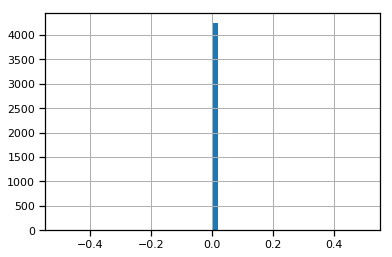

In [26]:
qso.query('Ext_law == 0')['EB_V'].hist(bins=50)  # extinction law 0 apparently means no extinction

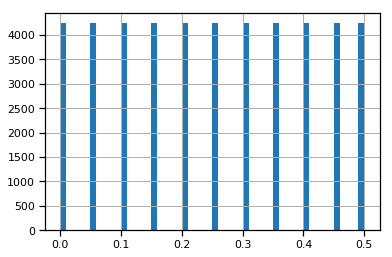

In [27]:
qso['EB_V'].hist(bins=50)  # extinction is in steps of ~0.05

# Filters

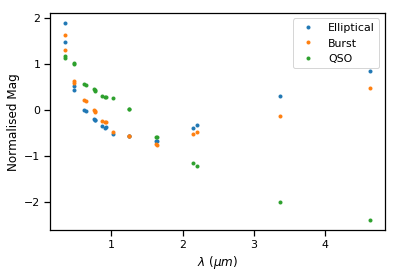

In [52]:
fig, ax = plt.subplots()
visualise_templates.visualise_mags(ellipticals.iloc[0], ax, label='Elliptical')
visualise_templates.visualise_mags(starburst.iloc[0], ax, label='Burst')
visualise_templates.visualise_mags(qso.iloc[0], ax, label='QSO')
ax.legend()

In [53]:
def all_bands_valid(df):
    valid_by_band = np.array([(df[band] < 800) for band in visualise_templates.FILTERS])
    return df[valid_by_band.min(axis=0) > 0]

qso['category'] = 'qso'
starburst['category'] = 'starburst'
ellipticals['category'] = 'ellipticals'

valid_qso = all_bands_valid(qso)
valid_starburst = all_bands_valid(starburst)
valid_ellipticals = all_bands_valid(ellipticals)

In [54]:
cols_to_keep = list(visualise_templates.FILTERS.keys()) + ['category']
all_galaxies = pd.concat([valid_qso[cols_to_keep], valid_starburst[cols_to_keep], valid_ellipticals[cols_to_keep]])
all_galaxies['mean_across_bands'] = all_galaxies[visualise_templates.FILTERS].apply('mean', axis=1)
all_galaxies['mean_across_bands']
for band in visualise_templates.FILTERS:
    all_galaxies[band + '_normalised'] = all_galaxies[band] - all_galaxies['mean_across_bands']


In [55]:
# alpha = 0.5
# bins = 50

# sns.hist(all_galaxies, hue='category')
    
#     plt.figure()
    
#     starburst_band = starburst[starburst[band] < 800][band].values
#     ellipticals_band = ellipticals[ellipticals[band] < 800][band].values
#     sample_band = np.concatenate([qso_band, starburst_band, ellipticals_band])
#     sample_mean = sample_band.mean()
#     print(sample_mean, band)
#     plt.hist(qso_band - sample_mean, density=True, label='QSO', alpha=alpha, bins=bins)
#     plt.hist(starburst - sample_mean, density=True, label='Starburst', alpha=alpha, bins=bins)
#     plt.hist(ellipticals - sample_mean, density=True, label='Ellipticals', alpha=alpha, bins=bins)
#     plt.legend()
#     plt.xlabel(band)
# print(len(sample_band))

In [56]:
all_galaxies.iloc[0]

u_cfht                    -18.5106
g_cfht                    -18.6876
r_cfht                    -19.1368
i_cfht_old                -19.2697
i_cfht_new                -19.2449
z_cfht                    -19.3954
u_sdss                     -18.551
g_sdss                     -18.668
r_sdss                    -19.1338
i_sdss                    -19.2399
z_sdss                    -19.3979
z_vista                    -19.378
Y_vista                   -19.4225
J_vista                   -19.6747
H_vista                   -20.2852
Ks_vista                  -20.8356
J_ukidss                  -19.6682
H_ukidss                  -20.2744
K_ukidss                  -20.8962
WISE_1                    -21.6804
WISE_2                    -22.0855
category                       qso
mean_across_bands         -19.6874
u_cfht_normalised          1.17684
g_cfht_normalised         0.999843
r_cfht_normalised         0.550643
i_cfht_old_normalised     0.417743
i_cfht_new_normalised     0.442543
z_cfht_normalised   

In [57]:
all_galaxies[visualise_templates.FILTERS].describe()

,u_cfht,g_cfht,r_cfht,i_cfht_old,i_cfht_new,z_cfht,u_sdss,g_sdss,r_sdss,i_sdss,...,z_vista,Y_vista,J_vista,H_vista,Ks_vista,J_ukidss,H_ukidss,K_ukidss,WISE_1,WISE_2
count,196058.000000,196058.000000,196058.000000,196058.000000,196058.000000,196058.000000,196058.000000,196058.000000,196058.000000,196058.000000,...,196058.000000,196058.000000,196058.000000,196058.000000,196058.000000,196058.000000,196058.000000,196058.000000,196058.000000,196058.000000
mean,33.183419,31.813535,30.990486,30.504999,30.543461,30.213883,34.368032,31.983061,31.021180,30.558428,...,30.292271,29.925106,29.502343,28.973717,28.623823,29.508375,28.983202,28.595068,28.264563,28.172066
std,5.503012,4.587679,4.239583,4.136440,4.142177,4.094627,7.015230,4.745082,4.248310,4.145431,...,4.132735,4.038341,3.916501,3.727573,3.618908,3.918794,3.731226,3.610764,3.510848,3.481961
min,-18.899600,-18.923500,-19.173400,-19.269700,-19.244900,-19.395400,-18.950000,-18.935100,-19.173400,-19.239900,...,-19.378000,-19.422500,-19.674700,-20.285200,-20.835600,-19.668200,-20.274400,-20.896200,-21.680400,-22.085500
25%,30.288400,29.821350,29.130350,28.472700,28.518625,28.222800,30.415625,29.885750,29.178125,28.528325,...,28.253300,28.022800,27.767100,27.466400,27.245575,27.770700,27.471825,27.219100,27.038225,27.114900
50%,32.937650,32.171450,31.672600,31.306300,31.339900,30.992200,33.255850,32.244700,31.693500,31.354100,...,31.072400,30.566400,30.036600,29.619600,29.297100,30.040700,29.626850,29.264700,28.888500,28.900500
75%,36.130675,34.301675,33.445100,33.018400,33.052175,32.747775,37.372100,34.460975,33.473300,33.064975,...,32.842675,32.471275,31.988975,31.231900,30.858875,31.998200,31.242975,30.826400,30.387000,30.192800
max,55.674500,48.367600,40.629300,37.898300,38.014100,37.203000,69.177200,51.497600,40.759000,38.088400,...,38.321700,37.190800,36.058200,34.770400,33.737200,36.083400,34.802800,33.690600,32.993400,32.525700


/media/mike/Windows/linux_cache/py36/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


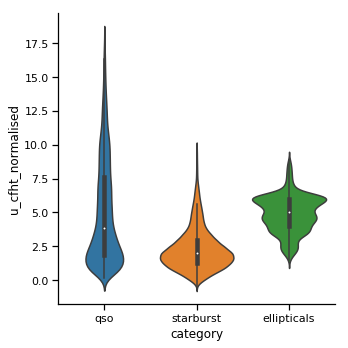

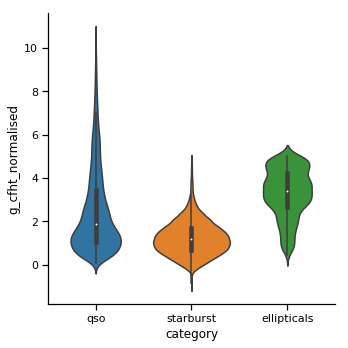

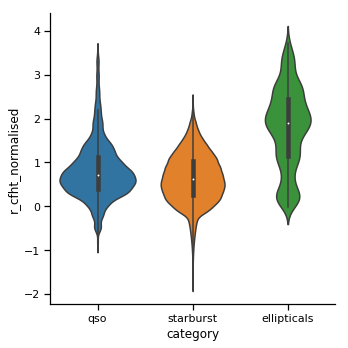

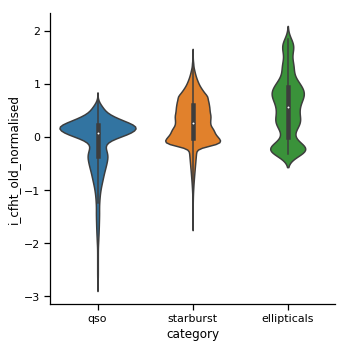

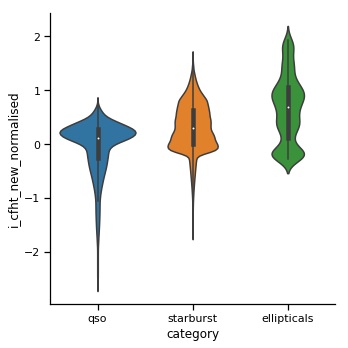

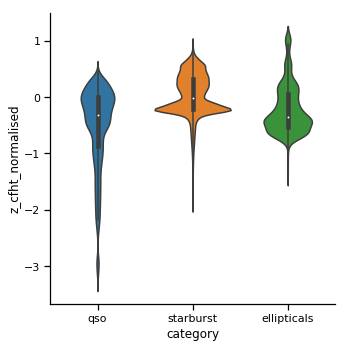

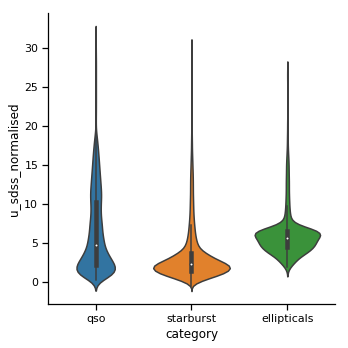

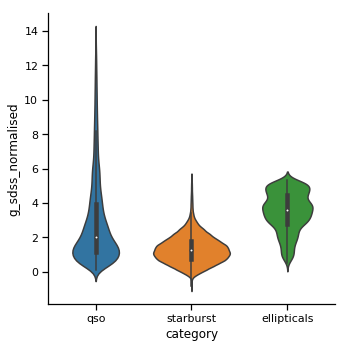

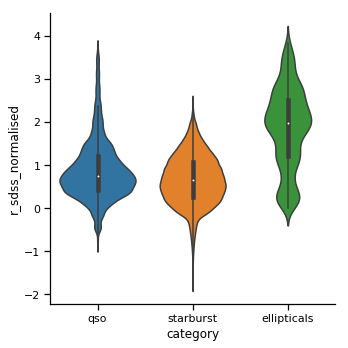

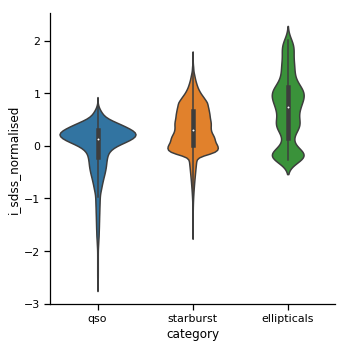

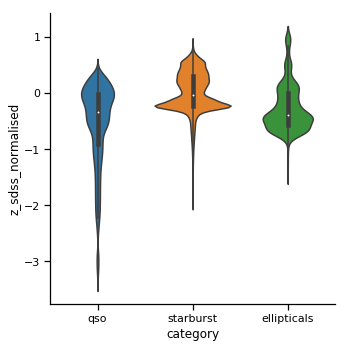

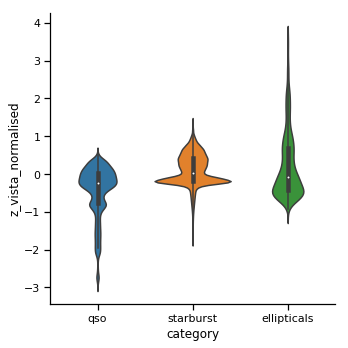

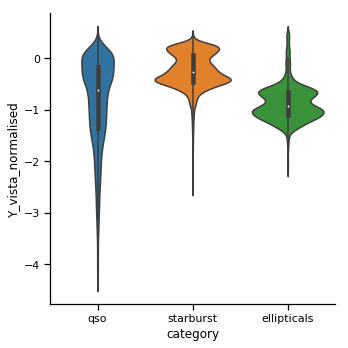

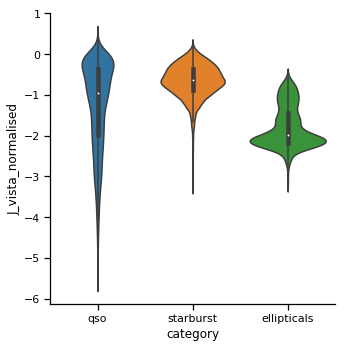

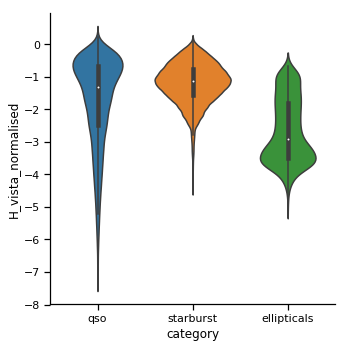

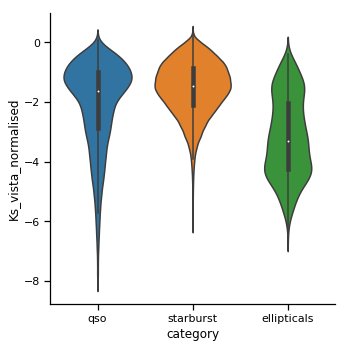

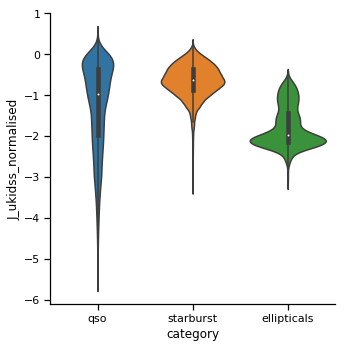

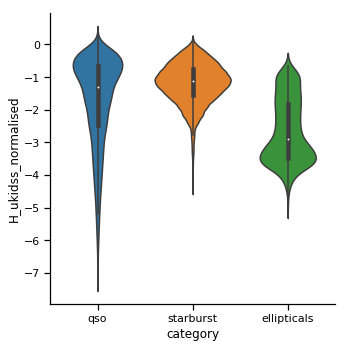

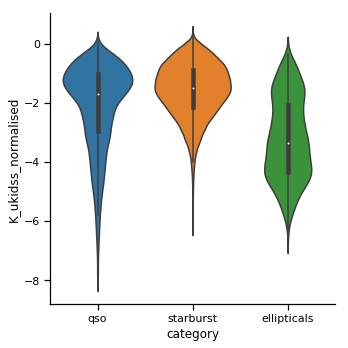

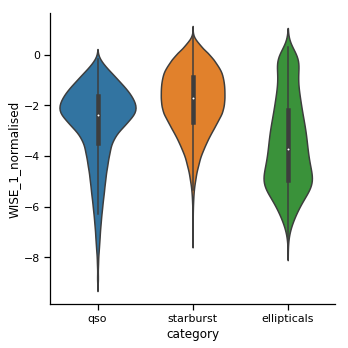

In [ ]:
for band in visualise_templates.FILTERS:
    sns.catplot(x="category", y=band + "_normalised", kind="violin", data=all_galaxies)

### How important is CFHT i old vs. i new?

Offsets: 46650 of 46662
count    46650.000000
mean         0.002989
std          0.003436
min         -0.011964
25%          0.001040
50%          0.002260
75%          0.004160
max          0.029531
dtype: float64


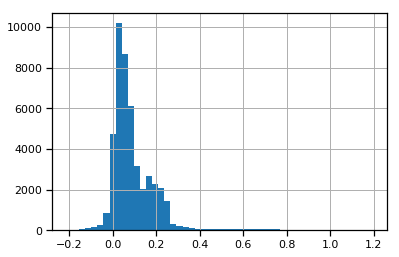

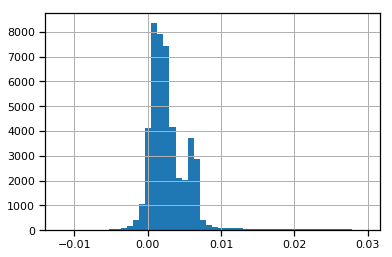

In [58]:
offset = qso['i_cfht_new'] - qso['i_cfht_old']
offset.hist(bins=50)
has_offset = offset != 0
print('Offsets: {} of {}'.format(has_offset.sum(), len(qso)))

qso['i_cfht'] = (qso['i_cfht_new'] + qso['i_cfht_old']) / 2.
fractional_offset = offset[has_offset] / qso[has_offset]['i_cfht']
print(fractional_offset.describe())
plt.figure()
fractional_offset.hist(bins=50)

Typical change in i-band mag is around 0.1%. Probably safe to ignore.

### How important is the survey filter used?

In [62]:
def get_fractional_offset(df, band_a, band_b):
    offset = df[band_a] - qso[band_b]
    average = (df[band_a] + df[band_b]) / 2
    has_offset = offset != 0
    return offset[has_offset] / average[has_offset]
    

KeyError: 'K_vista'

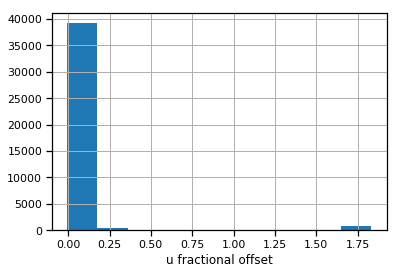

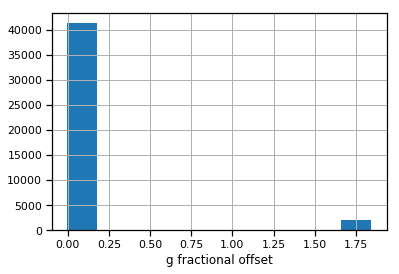

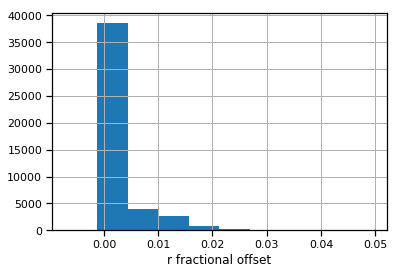

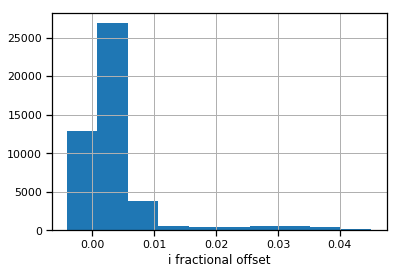

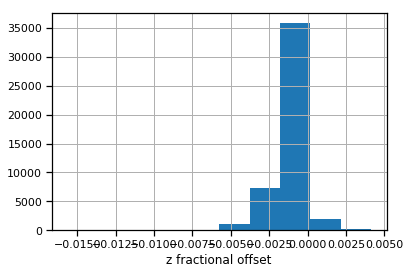

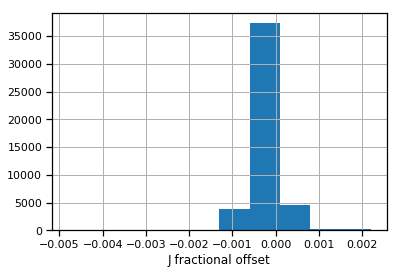

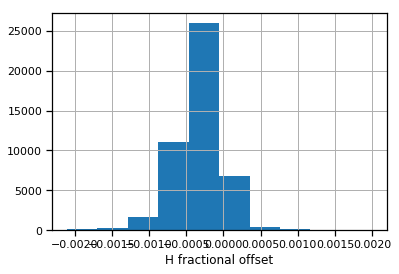

In [69]:
sdss_cfht_filters = ['u', 'g', 'r', 'i', 'z']
for band in sdss_cfht_filters:
    fractional_offset = get_fractional_offset(qso, band + '_sdss', band + '_cfht')
    plt.figure()
    plt.xlabel(band + ' fractional offset')
    fractional_offset.hist()

vista_ukidss_filters = [ 'J', 'H', 'K']
for band in vista_ukidss_filters:
    fractional_offset = get_fractional_offset(qso, band + '_vista', band + '_ukidss')
    plt.figure()
    plt.xlabel(band + ' fractional offset')
    fractional_offset.hist()